In [1]:
# MODULE 
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rc  

# 한글 폰트 설정
font_path='./Font/malgun.ttf'
font_name=fm.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

# FILE
DIR ='./Data/'
FILE1=DIR+'월별_국내여행_지출(2018~2020).csv'
FILE2=DIR+'월별_국내여행_횟수(2018~2020).csv'


In [2]:
# READ 
expenseDF=pd.read_csv(FILE1, encoding='CP949', header=None)
travelNumberDF=pd.read_csv(FILE2, encoding='CP949')

## 데이터 전처리 :

In [3]:
expenseDF.head()
# (단위: 십억원)

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,통계분류(1),통계분류(2),2018,2018,2018,2018,2018,2018,2018,2018,...,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020
1,통계분류(1),통계분류(2),1월,2월,3월,4월,5월,6월,7월,8월,...,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
2,전체,소계,3749,4473,3627,3208,3643,3350,3831,4090,...,1071,1449,1967,1983,2581,2608,1935,2021,1753,1750
3,성별,남자,1984,2396,1813,1592,1895,1702,2087,2190,...,545,715,960,996,1348,1436,976,984,869,939
4,성별,여자,1765,2077,1813,1616,1748,1648,1744,1900,...,527,734,1008,987,1233,1172,959,1038,884,811


In [4]:
expenseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       39 non-null     object
 1   1       39 non-null     object
 2   2       39 non-null     object
 3   3       39 non-null     object
 4   4       39 non-null     object
 5   5       39 non-null     object
 6   6       39 non-null     object
 7   7       39 non-null     object
 8   8       39 non-null     object
 9   9       39 non-null     object
 10  10      39 non-null     object
 11  11      39 non-null     object
 12  12      39 non-null     object
 13  13      39 non-null     object
 14  14      39 non-null     object
 15  15      39 non-null     object
 16  16      39 non-null     object
 17  17      39 non-null     object
 18  18      39 non-null     object
 19  19      39 non-null     object
 20  20      39 non-null     object
 21  21      39 non-null     object
 22  22      39 non-null     obje

In [5]:
# 3번 행부터 끝까지 삭제
expenseDF=expenseDF.iloc[:3]
expenseDF

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,통계분류(1),통계분류(2),2018,2018,2018,2018,2018,2018,2018,2018,...,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020
1,통계분류(1),통계분류(2),1월,2월,3월,4월,5월,6월,7월,8월,...,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
2,전체,소계,3749,4473,3627,3208,3643,3350,3831,4090,...,1071,1449,1967,1983,2581,2608,1935,2021,1753,1750


In [6]:
# 0번, 1번 열 삭제
expenseDF.drop([0,1],axis=1,inplace=True)


In [7]:
expenseDF

,2,3,4,5,6,7,8,9,10,11,...,28,29,30,31,32,33,34,35,36,37
0,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,...,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020
1,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,...,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
2,3749,4473,3627,3208,3643,3350,3831,4090,3894,2937,...,1071,1449,1967,1983,2581,2608,1935,2021,1753,1750


In [8]:
# 행열 전환
expenseDF=expenseDF.T
expenseDF.head()

,0,1,2
2,2018,1월,3749
3,2018,2월,4473
4,2018,3월,3627
5,2018,4월,3208
6,2018,5월,3643


In [9]:
# 칼럼명 설정 
expenseDF.columns=['year','month','expense']
expenseDF.head(3)

,year,month,expense
2,2018,1월,3749
3,2018,2월,4473
4,2018,3월,3627


In [10]:
# month 컬럼 int64로 type cast
month_list=[]
for i in expenseDF['month']:
    month_list.append(i[:-1])

expenseDF['month']=month_list

expenseDF.head(3)

,year,month,expense
2,2018,1,3749
3,2018,2,4473
4,2018,3,3627


In [11]:
# 데이터 type 확인
expenseDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 2 to 37
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   year     36 non-null     object
 1   month    36 non-null     object
 2   expense  36 non-null     object
dtypes: object(3)
memory usage: 2.2+ KB


In [12]:
# type cast 
expenseDF=expenseDF.astype('int64')
expenseDF.dtypes

year       int64
month      int64
expense    int64
dtype: object

In [13]:
# 연도별 DF 생성 
expenseDF_year=expenseDF.groupby(by='year')
expenseDF_2018=expenseDF_year.get_group(2018)
expenseDF_2018

,year,month,expense
2,2018,1,3749
3,2018,2,4473
4,2018,3,3627
5,2018,4,3208
6,2018,5,3643
7,2018,6,3350
8,2018,7,3831
9,2018,8,4090
10,2018,9,3894
11,2018,10,2937


In [14]:
expenseDF_2019=expenseDF_year.get_group(2019)
expenseDF_2020=expenseDF_year.get_group(2020)

In [15]:
# 각 DF year drop 및 month 칼럼 인덱스 설정
expenseDF_lst=[expenseDF_2018,expenseDF_2019,expenseDF_2020]
for i in expenseDF_lst:
    i.drop('year',axis=1,inplace=True)
    i.set_index('month',inplace=True)

expenseDF_2018


C:\Users\User\AppData\Local\Temp\ipykernel_8332\2915083294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop('year',axis=1,inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_8332\2915083294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop('year',axis=1,inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_8332\2915083294.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i.drop('year',axis=1,inplace=True)


,expense
month,
1,3749
2,4473
3,3627
4,3208
5,3643
6,3350
7,3831
8,4090
9,3894


In [16]:
expenseDF_allyear=pd.concat([expenseDF_2018,expenseDF_2019,expenseDF_2020],axis=1,ignore_index=True)  
expenseDF_allyear.columns=['e_2018','e_2019','e_2020']
expenseDF_allyear

,e_2018,e_2019,e_2020
month,,,
1,3749,3368,3535
2,4473,4363,1465
3,3627,3528,1071
4,3208,3285,1449
5,3643,3476,1967
6,3350,3017,1983
7,3831,4255,2581
8,4090,4408,2608
9,3894,3834,1935


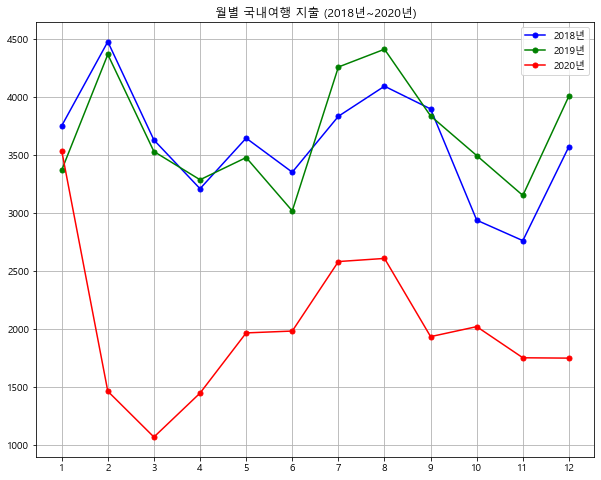

In [17]:
plt.figure(figsize=(10,8))
line1=plt.plot(expenseDF_allyear.index, expenseDF_allyear['e_2018'],'bo-',ms=5,label='2018년')
line2=plt.plot(expenseDF_allyear.index, expenseDF_allyear['e_2019'],'go-',ms=5,label='2019년')
line3=plt.plot(expenseDF_allyear.index, expenseDF_allyear['e_2020'],'ro-',ms=5,label='2020년')

plt.title('월별 국내여행 지출 (2018년~2020년)')
plt.xticks(list(expenseDF_allyear.index))
plt.grid(True)

lines=line1+line2+line3
labels=[l.get_label() for l in lines]
plt.legend(lines, labels, loc='upper right')

In [18]:
# # 연도별 expense 변화 그래프 
# x=expenseDF_2018.index
# a=expenseDF_2018['expense']
# b=expenseDF_2019['expense']
# c=expenseDF_2020['expense']

# fig, ax1=plt.subplots()
# line1=ax1.plot(x,a,'go-', ms=4, label='2018년')

# ax2=ax1.twinx()
# line2=ax2.plot(x,b,'bo-', ms=4, label='2019년')

# ax3=ax1.twinx()
# line3=ax3.plot(x,c,'ro-', ms=4, label='2020년')

# lines=line1+line2+line3
# labels=[l.get_label() for l in lines]

# ax1.set_xlabel('월')
# ax1.get_xticks(expenseDF_2018.index)
# ax1.legend(lines, labels, loc='upper right')
